# Projects Database Analysis 1

The purpose of this notebook is to respond to Jonathan's feedback on 6/14/24, that I need to "Fail fast." He wants me to begin analysis of the Marine Energy Industry.

### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import primrea.core

#path = "C:/Users/deca761/'OneDrive - PNNL'/Documents/'Work Items'/Ongoing/'PRIMRE Research Questions'/repo/notebooks/reports/'pjdb data'/"
path = "C:/Users/deca761/OneDrive - PNNL/Documents/Work Items/Ongoing/PRIMRE Research Questions/repo/notebooks/reports/pjdb data"

### Dev

In [2]:
projects_df = pd.read_csv(f'{path}/projects.csv')

In [3]:
projects_df.keys()

Index(['Name', 'Website', 'Project Description', 'Project Manager',
       'Project Status', 'Resource', 'Start Year', 'End Year',
       'Project Connectivity', 'Capacity MW', 'Project Scale',
       'Project Life Cycle', 'Devices', 'Number of Devices', 'Waterbody',
       'Site Characteristics', 'Country'],
      dtype='object')

In [4]:
projects_df['Start Year'].sort_values(ascending=True)

109       1999
47        2001
150       2001
132       2002
60        2005
        ...   
137    Planned
139    Planned
94     Planned
191    Planned
188        NaN
Name: Start Year, Length: 192, dtype: object

In [5]:
projects_df['Start Year'].sort_values(ascending=False)

0      Planned
89     Planned
104    Planned
102    Planned
101    Planned
        ...   
132       2002
150       2001
47        2001
109       1999
188        NaN
Name: Start Year, Length: 192, dtype: object

In [6]:
projects_df[(projects_df['Start Year']!='Planned') & (projects_df['Start Year']!='Canceled')]['Start Year'].sort_values(ascending=False)

162    2023
32     2023
72     2023
48     2023
176    2022
       ... 
132    2002
150    2001
47     2001
109    1999
188     NaN
Name: Start Year, Length: 114, dtype: object

In [7]:
start_years = list(projects_df[(projects_df['Start Year']!='Planned') & (projects_df['Start Year']!='Canceled')]['Start Year'].sort_values(ascending=False))
start_years = start_years[:-1]    # Removing the nan observation
start_years_unique = set(start_years)

In [8]:
# end_years = list(projects_df[(projects_df['End Year']!='Planned') & (projects_df['End Year']!='Canceled')]
# #                 .dropna()['End Year']
#                  .sort_values(ascending=False))
#end_years = end_years[:-1]    # Removing the nan observation
#end_years_unique = set(end_years)

In [9]:
#end_years = list(projects_df[(projects_df['End Year']!='Planned') & (projects_df['End Year']!='Canceled')]['End Year'].sort_values(ascending=False))
#end_years = end_years[:-1]    # Removing the nan observation
#end_years_unique = set(end_years)

end_years = projects_df['End Year']
end_years = end_years.dropna()
end_years = end_years.sort_values(ascending=True)
end_years = list(end_years)

In [10]:
str(int(end_years[0]))

'2004'

In [11]:
# Starts
years = list(range(1999, 2024))
starts = list()
for i in years:
    count = 0
    for j in start_years:
        if str(i) == j:
            count+=1
    starts.append(count)

In [12]:
starts

[1, 0, 2, 1, 0, 0, 2, 1, 2, 5, 3, 6, 5, 4, 7, 7, 11, 14, 5, 13, 3, 2, 6, 9, 4]

In [13]:
# Ends
ends = list()
for i in years:
    count = 0
    for j in end_years:
        if str(i) == str(int(j)):
            count+=1
    ends.append(count)

In [14]:
ends

[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 4, 3, 2, 5, 3, 3, 6, 7, 7, 6, 2, 1, 7, 6]

Create a metric for "devices active by this year"

In [15]:
# Diff
diff = list()
total_dev_deployed = 0
for i in range(0, len(years)):
    total_dev_deployed = total_dev_deployed + starts[i] - ends[i]
    diff.append(total_dev_deployed)

In [16]:
a = sum(starts)
b = sum(ends)
a-b

47

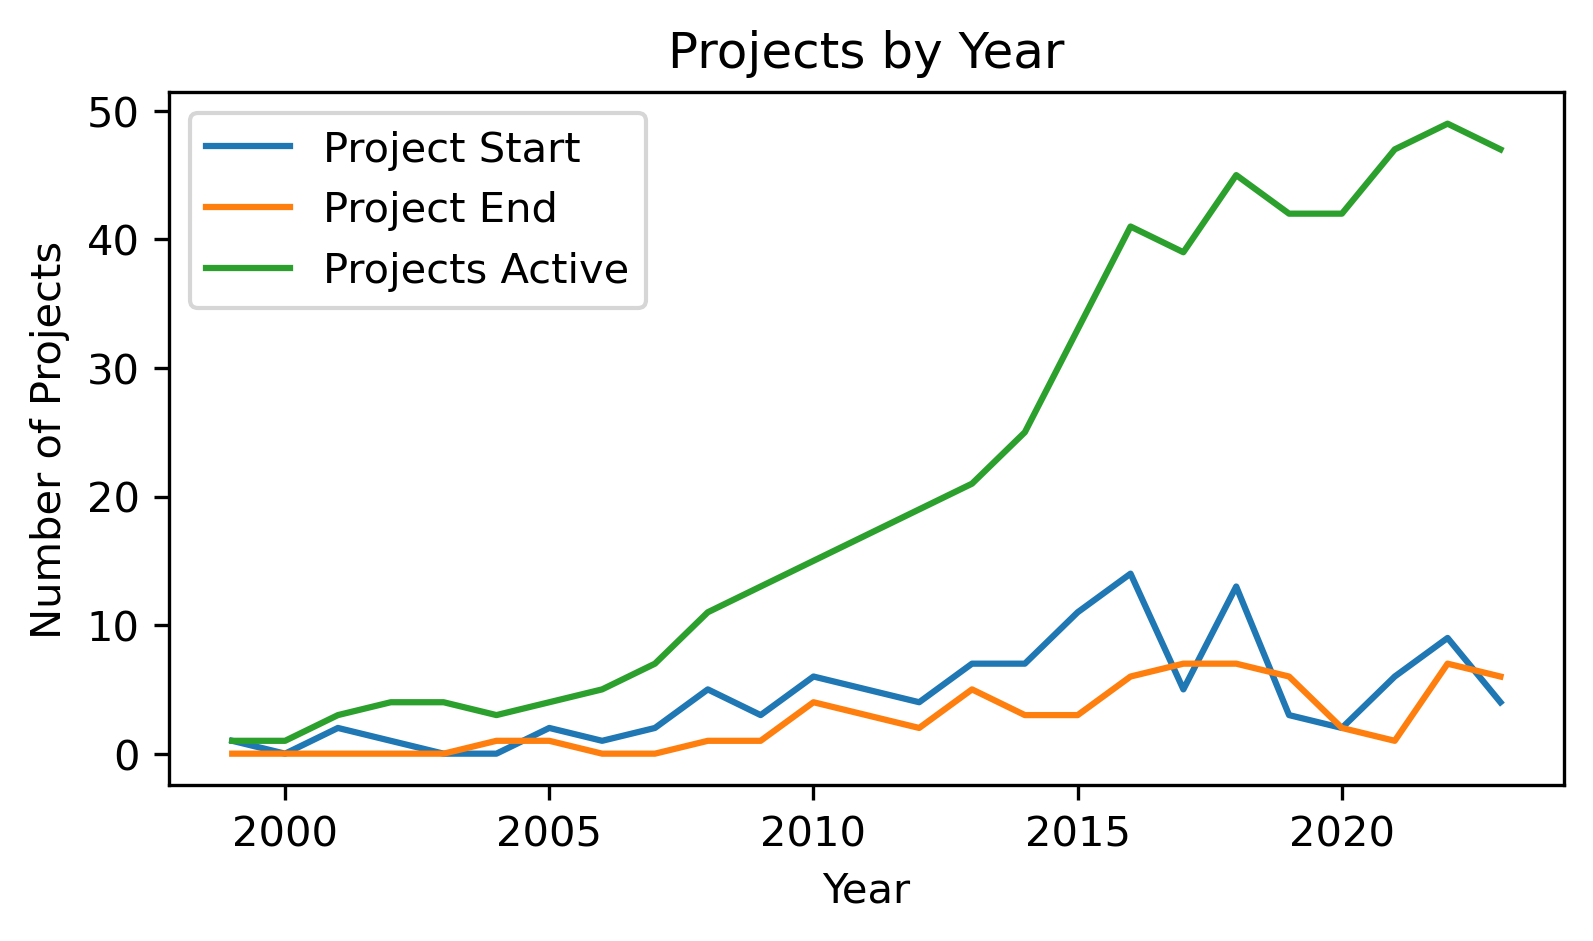

In [17]:
plt.rcParams['figure.dpi'] = 300
x = years
y = starts
z = ends
a = diff
fig, ax = plt.subplots()
ps, = ax.plot(x, y, label = 'Project Start')
pe, = ax.plot(x, z, label = 'Project End')
pa, = ax.plot(x, a, label = 'Projects Active')
ax.set_title('Projects by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Projects')
#ax.legend(['Project Start', 'Project End', 'Projects Active'])
ax.legend(handles = [ps, pe, pa])
fig.set_size_inches([6,3])
plt.savefig('foo.png', bbox_inches='tight')

The chart above is deeply problematic because, as a result of the data collection and field layouts, excludes the situations in which projects were shut down or cancelled before the "Project Start" field threshold was passed.

Subsequent analysis should be conducted to capture these observations, showing the relative proportion of the above "successes" to "failures."

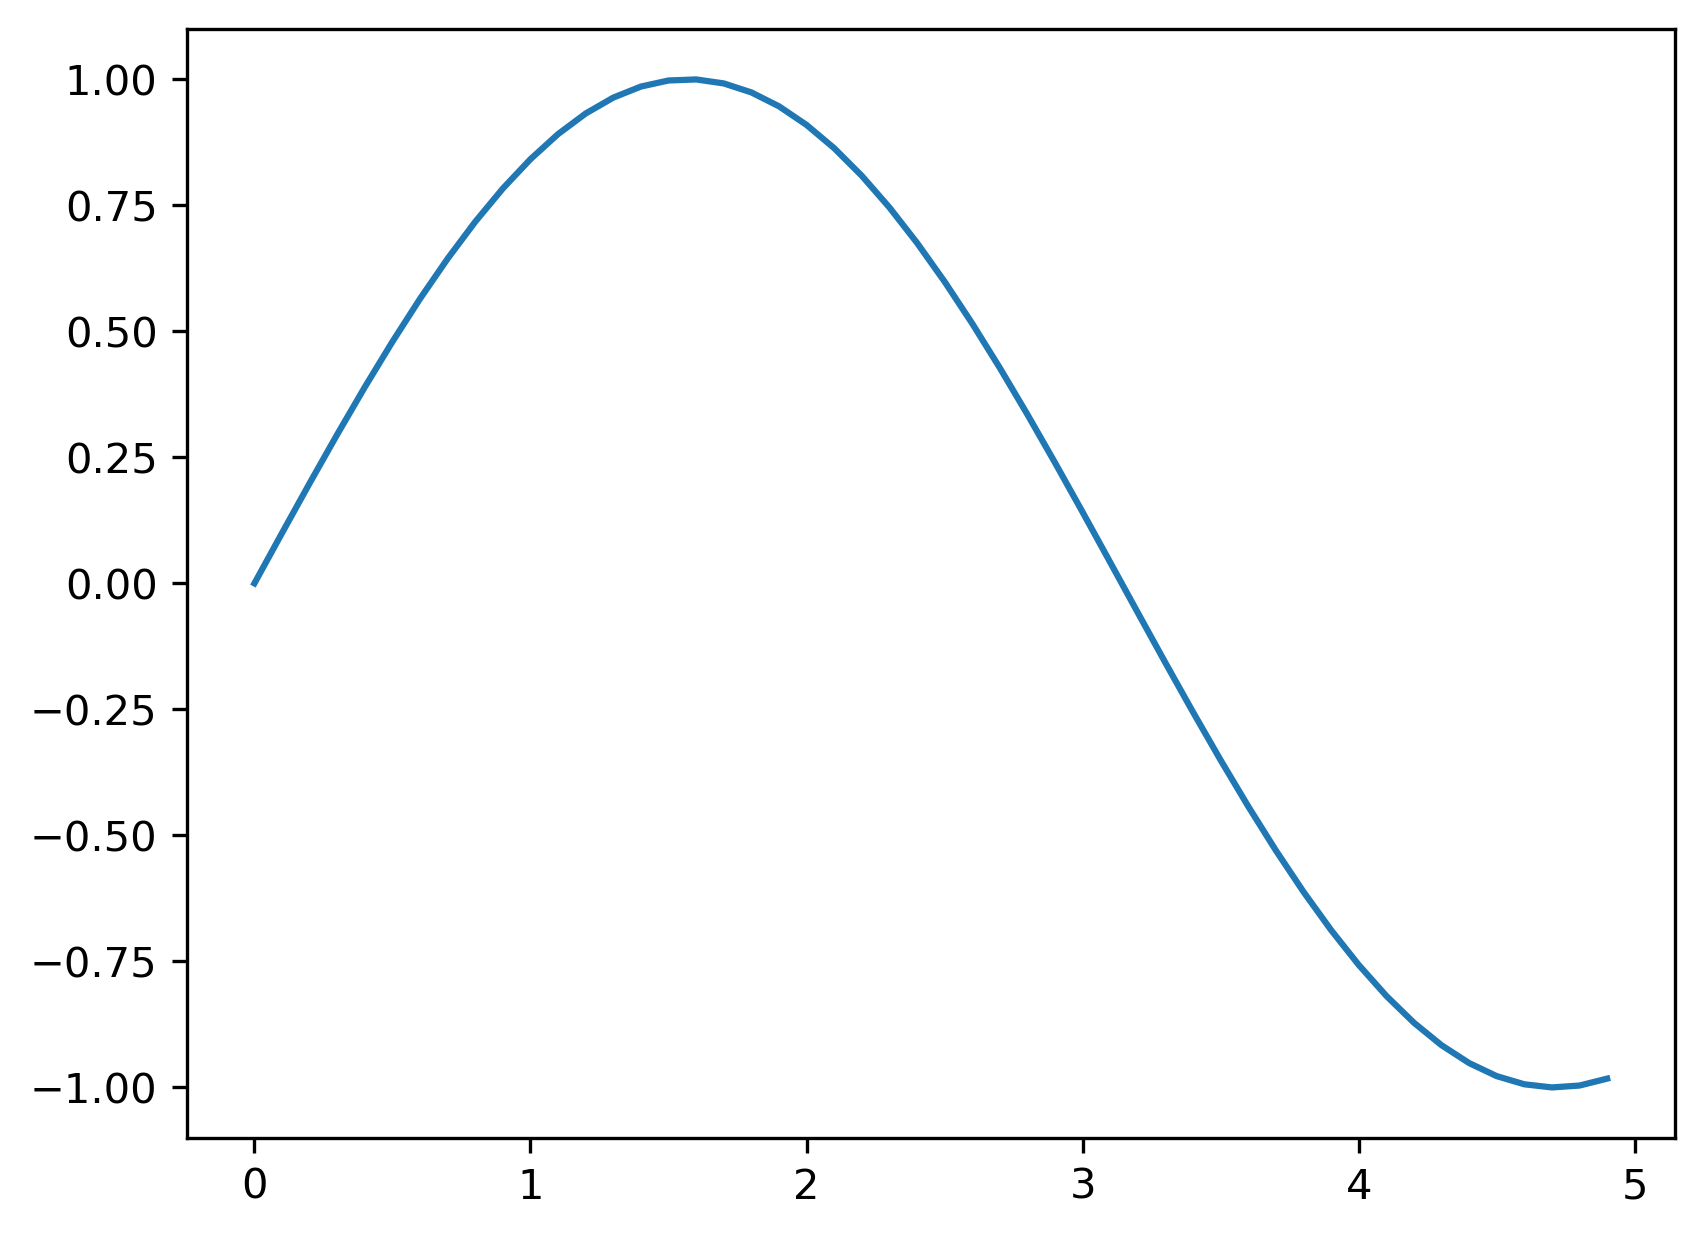

In [18]:
x = np.arange(0, 5, 0.1)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)

#### Save data to csv to create combined figure

In [40]:
save_path = 'C:/Users/deca761/OneDrive - PNNL/Documents/Work Items/Ongoing/PRIMRE Research Questions/repo/notebooks/reports'

In [30]:
cleaned_data_df = pd.DataFrame({'year':years, 'devices_started':starts, 'devices_ended':ends, 'active_devices':diff})
cleaned_data_df.head(3)

,year,devices_started,devices_ended,active_devices
0,1999,1,0,1
1,2000,0,0,1
2,2001,2,0,3


In [42]:
cleaned_data_df.to_csv(f'{save_path}/pjdb_fig_data.csv', index=False)

### Of those projects that are active, what are the statistics on their starting years?
<old>Are there some very old, well built units still out there, or were the majority of the devices whose deployments have not ended built recently?<old>

In [19]:
projects_df['Project Status']

0        Active
1      Inactive
2      Inactive
3        Active
4      Inactive
         ...   
187      Active
188      Active
189      Active
190    Inactive
191      Active
Name: Project Status, Length: 192, dtype: object

In [20]:
projects_df[(projects_df['Start Year']!='Planned') & (projects_df['Start Year']!='Canceled')]

,Name,Website,Project Description,Project Manager,Project Status,Resource,Start Year,End Year,Project Connectivity,Capacity MW,Project Scale,Project Life Cycle,Devices,Number of Devices,Waterbody,Site Characteristics,Country
1,PRIMRE/Databases/Projects Database/Projects/AO...,https://www.offshore-energy.biz/canada-aoes-te...,NaN,Accumulated Ocean Energy Inc,Inactive,Wave,2013,NaN,Not Grid Connected,NaN,Single Device,Completed,Pneumatic Wave Energy Converter pWEC,1.0,"Sooke Basin, British Columbia, Canada",Enclosed Bay,Canada
3,PRIMRE/Databases/Projects Database/Projects/Ad...,https://www.waveenergyscotland.co.uk/programme...,NaN,"Wave Energy Scotland,AWS Ocean Energy Ltd,4c E...",Active,Wave,2022,NaN,Not Grid Connected,0.015,Single Device,Operational,Archimedes Waveswing,1.0,"Scapa Flow, Orkney",Enclosed Bay,United Kingdom
4,PRIMRE/Databases/Projects Database/Projects/Af...,https://www.tocardo.com/contract-t-1-turbines-...,NaN,Tocardo International BV,Inactive,Tidal,2015,2019.0,Grid Connected,0.300,Array,Decommissioned,Tocardo International T1 Turbine,3.0,Afsluitdijk Sluice,Enclosed Bay,Netherlands
5,PRIMRE/Databases/Projects Database/Projects/Af...,https://www.tocardo.com/about/history/,NaN,Tocardo International BV,Inactive,Tidal,2008,2012.0,Grid Connected,0.100,Single Device,Decommissioned,Tocardo International T1 Turbine,1.0,Afsluitdijk Sluice,Enclosed Bay,Netherlands
11,PRIMRE/Databases/Projects Database/Projects/At...,https://www.waveenergyscotland.co.uk/programme...,NaN,"Wave Energy Scotland,4c Engineering Consultanc...",Inactive,Wave,2016,2018.0,NaN,NaN,Single Device,Completed,Seapower,1.0,NaN,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,PRIMRE/Databases/Projects Database/Projects/WS...,https://www.waveswell.com/king-island-project-2/,NaN,Wave Swell Energy Ltd,Inactive,Wave,2021,2023.0,Grid Connected,0.200,Single Device,Decommissioned,WSE UniWave200,1.0,"King Island harbour, Tasmania",Enclosed Bay,Australia
183,PRIMRE/Databases/Projects Database/Projects/Wa...,https://www.energisingcoasts.eu/water2energy,NaN,Water2Energy,Inactive,Tidal,2021,2022.0,Grid Connected,0.100,Single Device,Completed,Water2Energy VAWT,1.0,Port of Flushing,Constricted Channel,Netherlands
184,PRIMRE/Databases/Projects Database/Projects/Wa...,https://seabased.com/projects,NaN,Seabased AB,Inactive,Wave,2012,2013.0,Not Grid Connected,NaN,Single Device,Completed,Seabased WEC,1.0,Baltic Sea,Open Ocean,Finland
188,PRIMRE/Databases/Projects Database/Projects/We...,https://www.rechargenews.com/offshore-wind/dp-...,NaN,Orbital Marine Power,Active,Tidal,NaN,NaN,Grid Connected,200.000,Array,Planned,ANDRITZ Hydro HS1500,NaN,Atlantic Ocean,NaN,United Kingdom


In [21]:
projects_df

,Name,Website,Project Description,Project Manager,Project Status,Resource,Start Year,End Year,Project Connectivity,Capacity MW,Project Scale,Project Life Cycle,Devices,Number of Devices,Waterbody,Site Characteristics,Country
0,PRIMRE/Databases/Projects Database/Projects/3M...,https://bomborawave.com/latest-news/enzen-sele...,NaN,Enzen Global Limited,Active,Wave,Planned,NaN,Grid Connected,4.000,Single Device,Planned,Bombora mWave,1.0,"La Santa coast, Lanzarote, Canary Islands, Spain",Coastal,Spain
1,PRIMRE/Databases/Projects Database/Projects/AO...,https://www.offshore-energy.biz/canada-aoes-te...,NaN,Accumulated Ocean Energy Inc,Inactive,Wave,2013,NaN,Not Grid Connected,NaN,Single Device,Completed,Pneumatic Wave Energy Converter pWEC,1.0,"Sooke Basin, British Columbia, Canada",Enclosed Bay,Canada
2,PRIMRE/Databases/Projects Database/Projects/Ad...,https://www.snopud.com/community-environment/o...,NaN,Snohomish County PUD No 1,Inactive,Tidal,Canceled,NaN,Grid Connected,1.000,Sub-scale,Canceled,Open Centre Turbine,2.0,Puget Sound - Admiralty Inlet,Constricted Channel,United States
3,PRIMRE/Databases/Projects Database/Projects/Ad...,https://www.waveenergyscotland.co.uk/programme...,NaN,"Wave Energy Scotland,AWS Ocean Energy Ltd,4c E...",Active,Wave,2022,NaN,Not Grid Connected,0.015,Single Device,Operational,Archimedes Waveswing,1.0,"Scapa Flow, Orkney",Enclosed Bay,United Kingdom
4,PRIMRE/Databases/Projects Database/Projects/Af...,https://www.tocardo.com/contract-t-1-turbines-...,NaN,Tocardo International BV,Inactive,Tidal,2015,2019.0,Grid Connected,0.300,Array,Decommissioned,Tocardo International T1 Turbine,3.0,Afsluitdijk Sluice,Enclosed Bay,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,PRIMRE/Databases/Projects Database/Projects/We...,https://tidalengineering.co.uk/west-somerset-l...,NaN,Halcyon Tidal Power LLC,Active,Tidal,Planned,NaN,NaN,2500.000,Array,Planned,NaN,NaN,Bristol Channel,NaN,United Kingdom
188,PRIMRE/Databases/Projects Database/Projects/We...,https://www.rechargenews.com/offshore-wind/dp-...,NaN,Orbital Marine Power,Active,Tidal,NaN,NaN,Grid Connected,200.000,Array,Planned,ANDRITZ Hydro HS1500,NaN,Atlantic Ocean,NaN,United Kingdom
189,PRIMRE/Databases/Projects Database/Projects/Wy...,https://www.visitfleetwood.info/about/seafront...,NaN,SIMEC Atlantis Energy,Active,"Tidal,Riverine",Planned,NaN,Grid Connected,160.000,Array,Planned,SAE AR1500,NaN,Atlantic Ocean,River,United Kingdom
190,PRIMRE/Databases/Projects Database/Projects/Yo...,https://www.wavec.org/contents/files/15--keyyo...,NaN,Korea Research Institute of Ships and Ocean En...,Inactive,Wave,2016,2019.0,Grid Connected,0.500,Single Device,Completed,Yongsoo OWC,1.0,"Yellow Sea, Jeju Island, South Koread",Coastal,South Korea
